## Observations and Insights

## Dependencies and starter code

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data= pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean= mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median= mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance= mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_Deviation = mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM= mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [37]:
TumorVolume_Summary= pd.DataFrame({"Mean":Mean, "Median":Median, "Variance":Variance, "Standard Deviation":Standard_Deviation, "SEM":SEM})
TumorVolume_Summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Treatment_Count = mouse_data['Drug Regimen'].value_counts()
Treatment_Count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

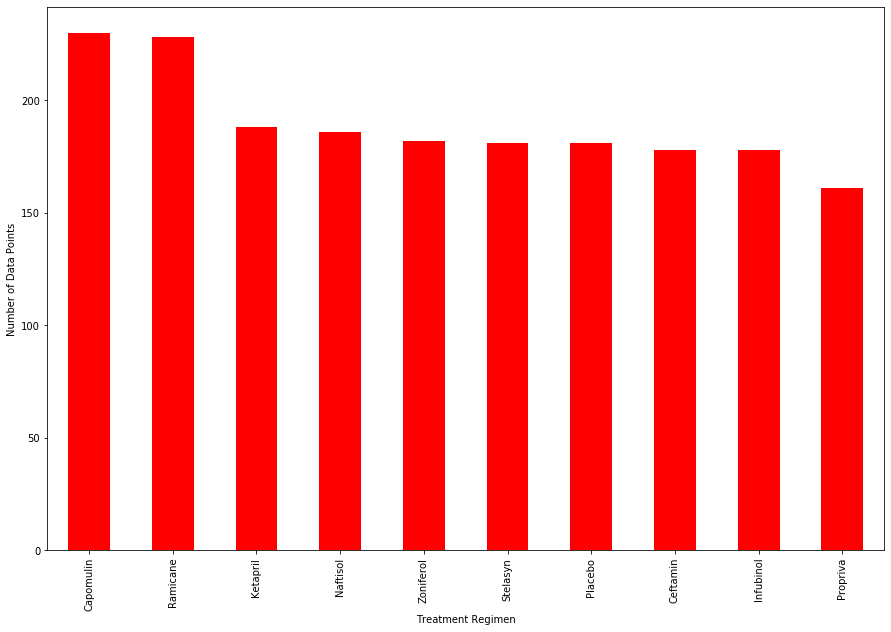

In [39]:
Treatment_Count.plot(kind="bar", facecolor="red", figsize=(15,10))

plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie plots

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Sex_Chart= mouse_data["Sex"].value_counts()
Sex_Chart

Male      958
Female    935
Name: Sex, dtype: int64

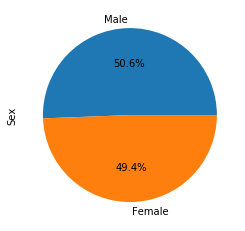

In [41]:
Sex_Chart.plot(kind="pie", autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Final_Volume= pd.DataFrame(mouse_data, columns = ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"])
Final_Volume= Final_Volume.groupby(["Mouse ID"]).max()
Final_Volume = Final_Volume.rename(columns={"Drug Regimen":"Drug"})
Final_Volume = Final_Volume.reset_index()
Final_Volume.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686


In [75]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = Final_Volume[Final_Volume.Drug == 'Capomulin']
Ramicane = Final_Volume[Final_Volume.Drug == 'Ramicane']
Infubinol = Final_Volume[Final_Volume.Drug == 'Infubinol']
Ceftamin = Final_Volume[Final_Volume.Drug == 'Ceftamin']

In [80]:
NDF= pd.concat([Capomulin, Ramicane, Infubinol, Ceftamin], ignore_index= True)
NDF.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3)
0,b128,Capomulin,45,45.651331
1,b742,Capomulin,45,45.000000
2,f966,Capomulin,20,45.000000
3,g288,Capomulin,45,46.304003
4,g316,Capomulin,45,46.809225


In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen